# Preprocessing for all signals

# Plot 

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
file = "2025-11-12_19-13-50-783.csv"
file = "2025-11-14_10-29-11-546.csv"
#file = "2025-11-12_19-13-50-783.csv"

In [3]:
df = pd.read_csv(file)
df

,CH1,CH3,time,Ts
0,-0.012000,-0.200156,0.000000e+00,2.000000e-09
1,-0.011938,-0.279844,2.000000e-09,NaN
2,-0.016000,-0.240313,4.000000e-09,NaN
3,-0.000063,-0.280156,6.000000e-09,NaN
4,-0.000031,-0.260000,8.000000e-09,NaN
...,...,...,...,...
9995,-0.008031,7.419844,1.999000e-05,NaN
9996,-0.012156,7.419844,1.999200e-05,NaN
9997,-0.019906,7.419844,1.999400e-05,NaN
9998,-0.007906,7.419844,1.999600e-05,NaN


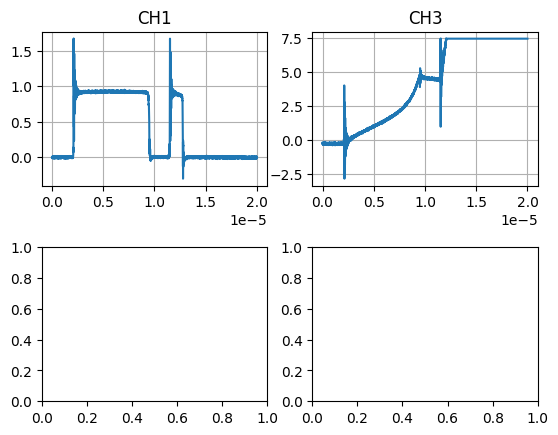

In [4]:
fig, axs = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.4, wspace=None) 
axs  = axs.flatten()
i=0
for c in df.columns:
    if "CH" in c: 
        
        axs[i].plot(df.time, df[c])
        axs[i].set_title(c)
        axs[i].grid()
        i=i+1
    #print(c)

In [5]:
Ts=  df.loc[0, "Ts"]
Ts

np.float64(2e-09)

In [6]:
df.columns

Index(['CH1', 'CH3', 'time', 'Ts'], dtype='object')

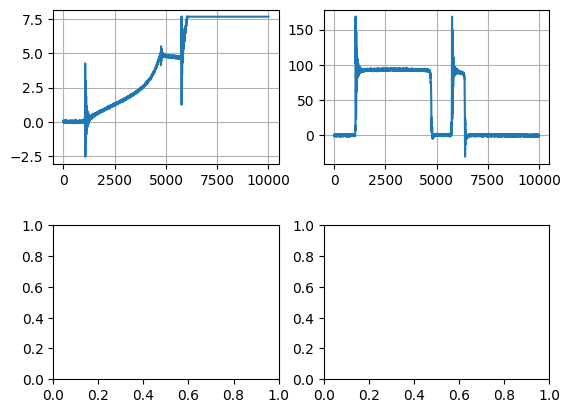

In [7]:
R= 0.0150 # R150
#ID = (df["CH2"]/R).values# V = r*i
#ID = ID -ID [:200].mean()
time = df.time.values
vds= df.CH1.values*100 # 1/100 sonde 
vds= vds -vds[:200].mean()
IL= (df.CH3) .values # mA
IL = IL -IL[:200].mean()
#plt.plot(time, ID) 
#plt.plot(time, IL)

arr=[#ID, 
    IL, vds]

fig, axs = plt.subplots(2,2)
plt.subplots_adjust(hspace=0.4, wspace=None) 
axs  = axs.flatten()
for i in range(len(arr)):
    axs[i].plot(arr[i])
    axs[i].grid()



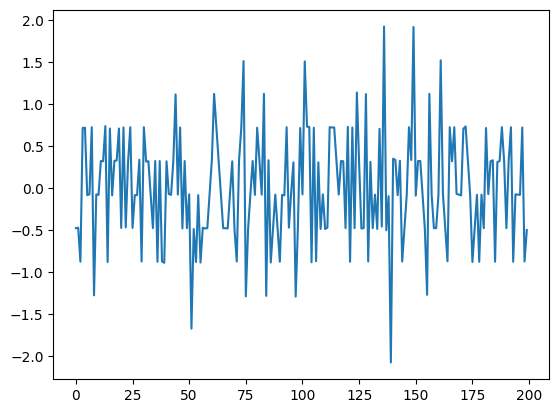

In [8]:
plt.plot(vds[:200])

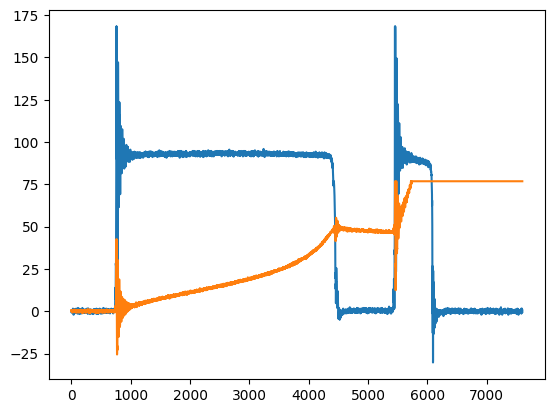

In [9]:
ns=200+100
ne= 8000-100
VDS2= vds[ns:ne]
IL2 = IL[ns:ne]
plt.plot(VDS2)
plt.plot(IL2*10)

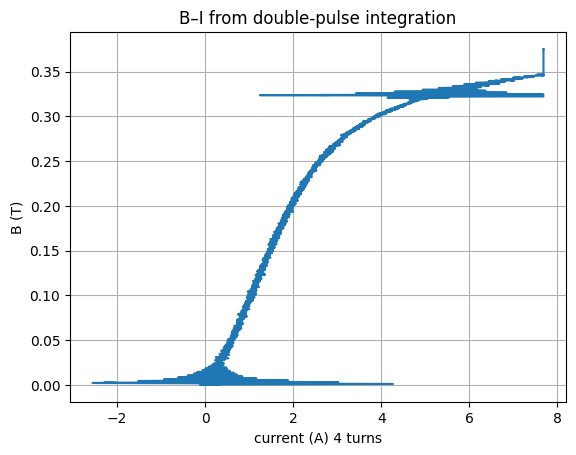

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- Inputs you must have from your measurement ---
# vL: numpy array of the inductor voltage over the interval of interest (V)
# IL3: numpy array of the inductor current over same interval (A)
# Ts: sample period (s)
# N: number of turns
# Ae_mm2: effective core area in mm^2

N = 4
Ae_mm2 = 534.2
Ae = Ae_mm2 * 1e-6  # m^2

# ----- Preprocess voltage: remove DC offset to avoid drift -----


# ----- Integrate to get flux linkage then flux -----
# cumulative integral (rectangle rule); for better accuracy use trapezoid below
lambda_linkage = np.cumsum(VDS2) * Ts              # Wb-turn
# or: lambda_linkage = np.concatenate(([0], np.cumtrapz(vL, dx=Ts)))

phi = lambda_linkage / N                          # Wb
B = phi / Ae                                      # T

# (Optional) realign so B(0)=0
#B = B - B[0]
B = B

# ----- Plot B vs I -----
plt.figure()
plt.plot(IL2, B)
plt.grid(True)
plt.xlabel(f"current (A) {N} turns")
plt.ylabel("B (T)")
plt.title("B–I from double-pulse integration")
plt.show()

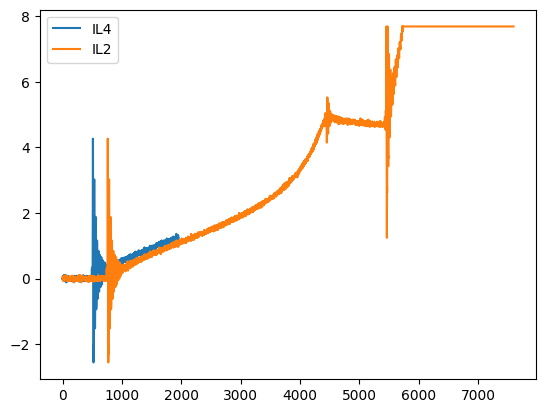

130.33557423092148 8145.973389432593
-15.146110526743826 %


(np.float64(0.00013033557423092147), np.float64(3.202400610284039e-05))

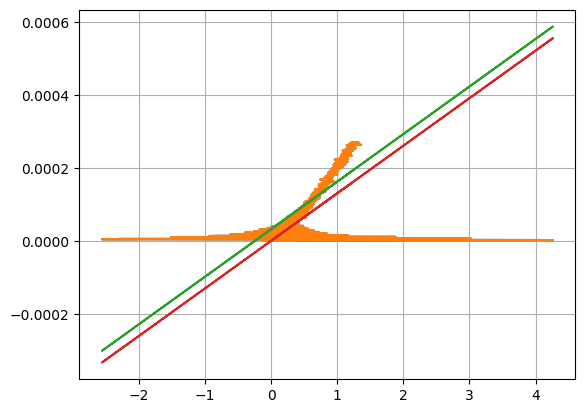

In [11]:
# V = L di/dt 
# V*dt = L di 
# if L constant 
# Flux_link = integ(V*dt) = L integ(di) = L i 
n1= 250
n2 = 2200
#n1= 0
#n2 = len(IL2)
IL4 = IL2[n1: n2]
time4 = np.arange (0,len(IL4)*Ts,Ts)

Lam4 = lambda_linkage[n1:n2]
VDS4 = VDS2[n1:n2]
#Lam4  = Lam4-Lam4[0]
#IL4 = IL4-IL4[0]
plt.plot(IL4, label ="IL4")
plt.plot(IL2, label = "IL2")
plt.legend()
plt.show()
plt.plot(IL4, Lam4)


from sklearn.linear_model import  LinearRegression as LR 


x = IL4.reshape(-1, 1)
y = Lam4

lr = LR()
lr.fit(x, y)
a = lr.coef_[0]
b = lr.intercept_
plt.plot(IL4, Lam4)
plt.plot(IL4, IL4*a+b)
plt.plot(IL4, IL4*a)

L_uH = 1e6*a
# L = Al *N**2
Al_nH = (L_uH /N**2) *1000
print(L_uH, Al_nH)

Al_nH_nom = 9600 # N97 AL = 9600 25% 
error = 100*(Al_nH-Al_nH_nom) /Al_nH_nom
print(error, "%")
plt.grid()
a, b

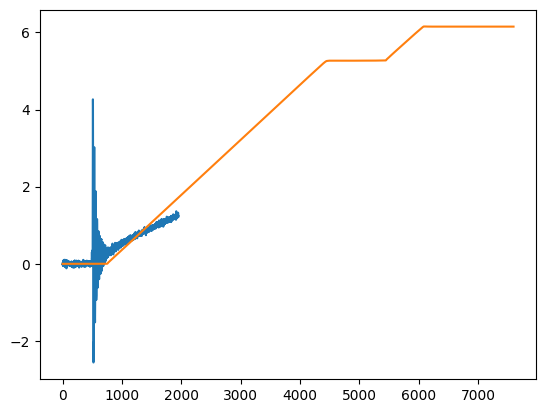

In [12]:
# v = L di/dt 
Ical = np.cumsum(VDS2) * Ts  /((L_uH)*1e-6)  
time3 = np.arange (0,len(Ical)*Ts,Ts)

plt.plot(IL4, label ="IL4")
plt.plot(Ical , label ="Ical")

In [13]:
Al_nH = (L_uH /N**2) *1000
Al_nH , L_uH

(np.float64(8145.973389432593), np.float64(130.33557423092148))

In [14]:
Al_nH = (2*L_uH /N**2) *1000
Al_nH_nom, Al_nH , L_uH

(9600, np.float64(16291.946778865185), np.float64(130.33557423092148))

In [15]:
vds[:200].mean(), IL[:200].mean()

(np.float64(2.6645352591003756e-17), np.float64(-1.9984014443252817e-17))

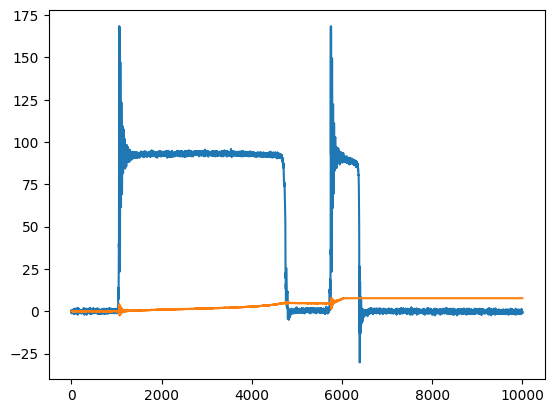

In [16]:
plt.plot(vds)
plt.plot(IL)

In [17]:
1e3*L_uH/4**2, Al_nH_nom,N

(np.float64(8145.973389432593), 9600, 4)

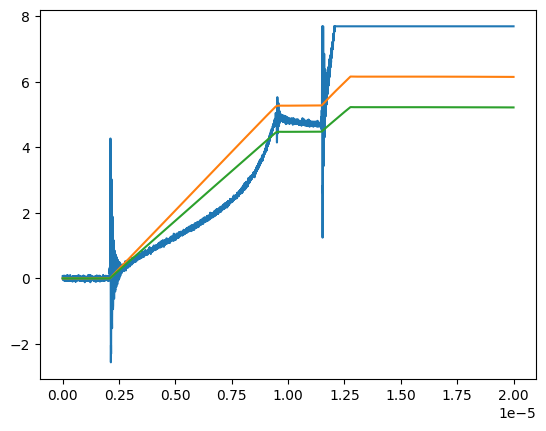

In [18]:
Ical = np.cumsum(vds) * Ts  /((L_uH)*1e-6)  
Icalnom = np.cumsum(vds) * Ts  /( 1e-9*Al_nH_nom*N**2)
plt.plot(time, IL)
plt.plot(time,Ical)
plt.plot(time,Icalnom)

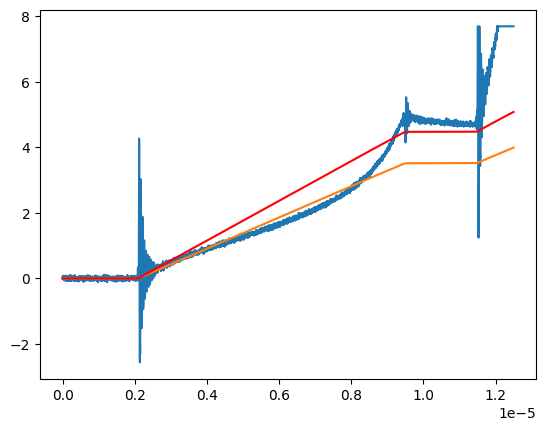

In [19]:
mask  =time<=1.25e-5

Ical = np.cumsum(vds) * Ts  /((1.5*L_uH)*1e-6)  
Icalnom = np.cumsum(vds) * Ts  /( 1e-9*Al_nH_nom*N**2)
plt.plot(time[mask], IL[mask])
plt.plot(time[mask],Ical[mask])
plt.plot(time[mask],Icalnom[mask], c="r")

https://www.tdk-electronics.tdk.com/download/531632/dbcde584d155cc270f5d5dbf1efec233/pdf-generaldefinitions.pdf

page 3 


BS is defined as the flux density at a field strength of H = 1200 A/m. 

ELP 120 20 38

https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf

In [20]:
mask  =time<=1.5e-5


time_= time[mask]
IL_ = IL[mask]
vds_= vds[mask]




# --- Inputs you must have from your measurement ---
# vL: numpy array of the inductor voltage over the interval of interest (V)
# IL3: numpy array of the inductor current over same interval (A)
# Ts: sample period (s)
# N: number of turns
# Ae_mm2: effective core area in mm^2

N = 4
Ae_mm2 = 534.2
Ae = Ae_mm2 * 1e-6  # m^2

# ----- Preprocess voltage: remove DC offset to avoid drift -----


# ----- Integrate to get flux linkage then flux -----
# cumulative integral (rectangle rule); for better accuracy use trapezoid below
lambda_linkage = np.cumsum(vds_) * Ts              # Wb-turn
# or: lambda_linkage = np.concatenate(([0], np.cumtrapz(vL, dx=Ts)))

phi = lambda_linkage / N                          # Wb
B = phi / Ae  



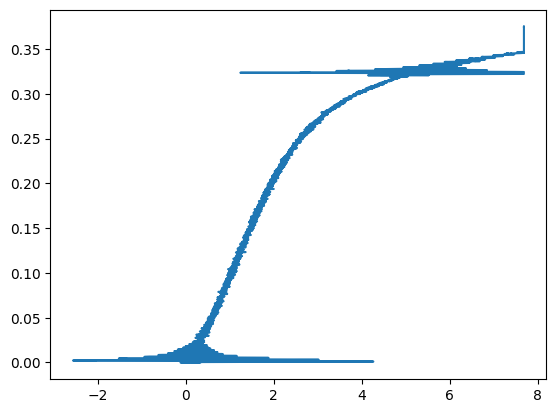

In [21]:
plt.plot(IL_, B)
# phi = B*A = L*i 
#plt.plot(IL_, L_uH*1e-6*IL_/Ae)

293.14089938810156 mT


(-100.0, 2704.4972153465346)

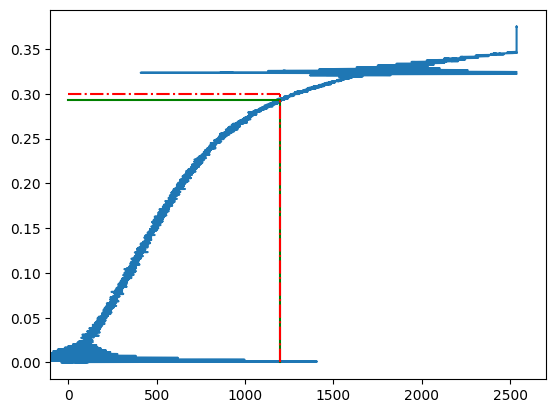

In [22]:
le_mm = 121.2 #mm ELP 102/20/38 with I 102/7/38
le=le_mm *1e-3 # m
H = N*IL_/le


H_= 10*H
Hsat =1200
i = np.argmin(np.abs(H_-Hsat))
Bsat_cal = B[i]
print(Bsat_cal*1000, "mT") # 304.7746755662612 mT
plt.plot(H_, B)
plt.plot([Hsat, Hsat], [0,Bsat_cal], c="g")
plt.plot([0, Hsat], [Bsat_cal,Bsat_cal], c="g")

plt.plot([Hsat, Hsat], [0,0.3], c="r", linestyle="-.")
plt.plot([0, Hsat], [0.3,0.3], c="r", linestyle="-.")
# phi = B*A = L*i 
plt.xlim([-100,None])
#plt.plot(IL_, L_uH*1e-6*IL_/Ae)

In [23]:
N, IL_.max(), le

(4, np.float64(7.6826421875), 0.1212)

In [24]:
from math import pi , sqrt 

#lets verify our cal from datasheet 
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf
# ELP 102/20/38 with I 102/7/38
Ae = 534.2e-6 # m2 (mm2 to m2)
le = 121.2e-3# mm => m
AL = 9600 # nH N96 +/- 25% 
N = 4 
mu_e = 1740 
mu_0 =  4*pi *10**-7 #μ 0 = 4 π ∗ 10 − 7 H / m
Bsat = 0.3 # T 
Hsat = 1200 # A/m
# Amplere theroy 
# B = mu_e * mu0 * N*I / le 
# H = N*I / le 
# So B/H = mu_e*mu0
Bsat/Hsat , mu_e*mu_0
# (0.00025, 0.002186548486898496)

(0.00025, 0.002186548486898496)

# DRAFT filter 

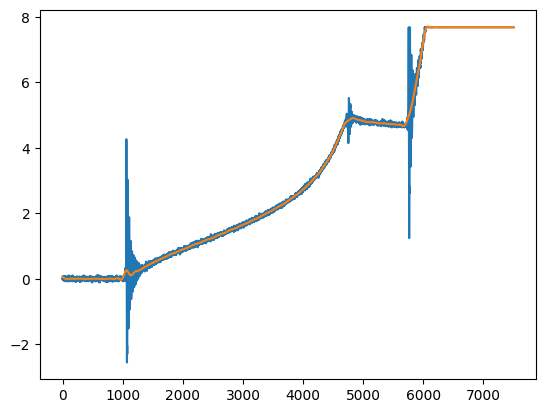

In [46]:
import numpy as np
from scipy.signal import butter, sosfiltfilt

#Ts = 4e-9           # 4 ns
Fs = 1 / Ts         # 250 MHz
fc = 4e6         # 200 kHz
wn = fc / (Fs/2)    # normalized cutoff

# Zero-phase low-pass (Butterworth IIR + filtfilt)
sos = butter(6, wn, btype='low', output='sos')  # order 6 is a good start
IL_filt = sosfiltfilt(sos, IL_)                # zero group delay
plt.plot(IL_)
plt.plot(IL_filt)

In [47]:
def findPeaks(a, threshold = 5, deltaIdx = 300):
    indexpeak = [0]
    for i in range(1,len(a)):
        #if a[i]>threshold :
        #print(i)
        if a[i]>threshold and i -indexpeak[-1] > deltaIdx :
            
            indexpeak.append(i)
    return indexpeak[1:]

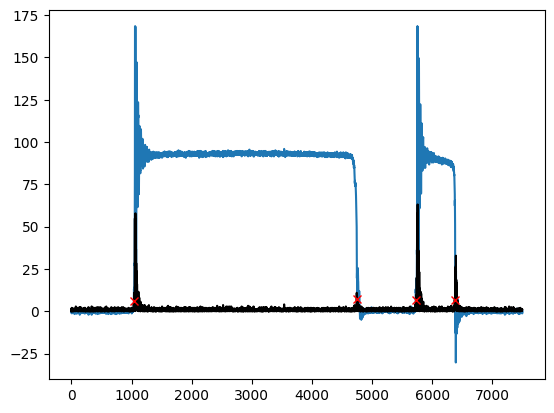

In [48]:
a  = np.abs(np.diff(vds_))
indexpeak = findPeaks(a, threshold = 5, deltaIdx = 300)
plt.plot(vds_)
plt.plot(a, c="k")
for i in indexpeak: 
    plt.plot([i], a[i], marker= "x", c="r")

In [49]:
IL_[:200].mean(), vds_[:200].mean()

(np.float64(-1.9984014443252817e-17), np.float64(2.6645352591003756e-17))

L = 214.91186094513745 uH  Al= 13431 b=0.0 error = 39 %


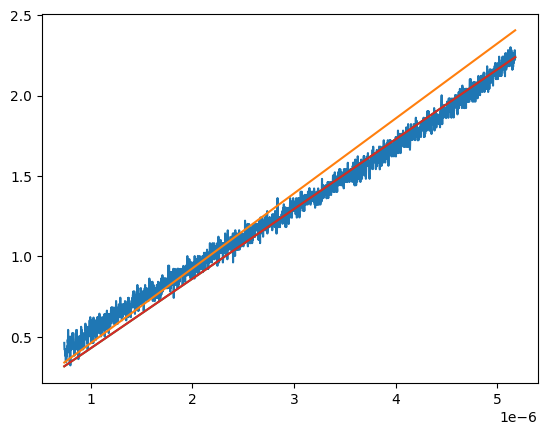

In [50]:
ILc= IL_[indexpeak[0]:indexpeak[1]]
vdsc= vds_[indexpeak[0]:indexpeak[1]]
time = np.arange(0,len(ILc)*Ts, Ts)
#plt.plot(time, ILc)
def find_L(ILc, vdsc, Ts, L0 = 200e-6):
    L = L0 # initial _value
    Ical = np.cumsum(vdsc) * Ts  /L
    #plt.plot(time, ILc)
    #plt.plot(time, Ical)
    n= len(ILc)
    ns=int(0.1*n) # remove start with oscillation 
    ne=n-int(0.3*n) # remove end with oscillation
    ILc2 = ILc[ns:ne]
    Ical2 = Ical[ns:ne]
    t2 = time[ns:ne]
    plt.plot(t2, ILc2)
    plt.plot(t2, Ical2)


    from sklearn.linear_model import  LinearRegression as LR 
    
    
    x = ((np.cumsum(vdsc) * Ts ) [ns:ne]).reshape(-1,1)
    y = ILc2
    
    lr = LR(fit_intercept=False)
    #lr = LR()
    lr.fit(x, y)
    a = lr.coef_[0]
    b = lr.intercept_

    L=1e6/a
    N= 4
    AL= 1e3*L/N**2
    er=(AL-9600)/9600
    print(f"L = {L} uH  Al= {int(AL)} b={b} error = {int(er*100)} %")
    plt.plot(t2, a*x+b)
    plt.plot(t2, a*x)
    return L, AL
    
L , AL = find_L(ILc, vdsc, Ts) 

In [51]:
len(ILc)

3699

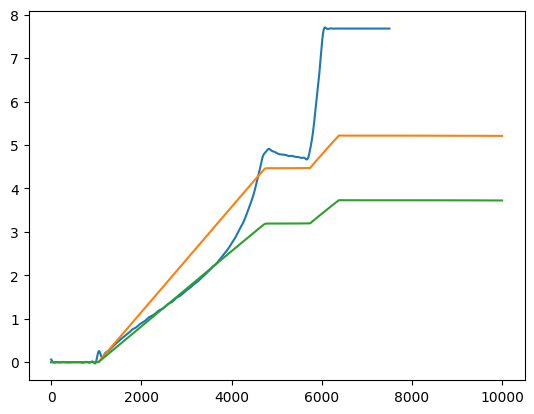

In [52]:
Icalnom = np.cumsum(vds) * Ts /( 1e-9*Al_nH_nom*N**2)
Ical = np.cumsum(vds) * Ts /( 1e-9*AL*N**2)
plt.plot(IL_filt)
plt.plot(Icalnom)
plt.plot(Ical)

In [53]:
# --- Inputs you must have from your measurement ---
# vL: numpy array of the inductor voltage over the interval of interest (V)
# IL3: numpy array of the inductor current over same interval (A)
# Ts: sample period (s)
# N: number of turns
# Ae_mm2: effective core area in mm^2

N = 4
Ae_mm2 = 534.2
Ae = Ae_mm2 * 1e-6  # m^2

# ----- Preprocess voltage: remove DC offset to avoid drift -----


# ----- Integrate to get flux linkage then flux -----
# cumulative integral (rectangle rule); for better accuracy use trapezoid below
lambda_linkage = np.cumsum(vdsc) * Ts              # Wb-turn
# or: lambda_linkage = np.concatenate(([0], np.cumtrapz(vL, dx=Ts)))

phi = lambda_linkage / N                          # Wb
B = phi / Ae  



293.0179240862484 mT


(-100.0, 1789.7540222772277)

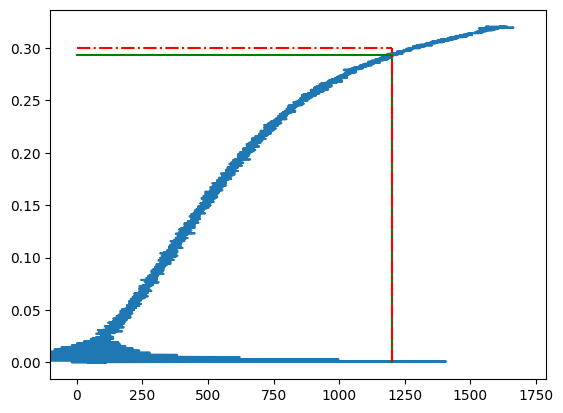

In [54]:
le_mm = 121.2 #mm ELP 102/20/38 with I 102/7/38
le=le_mm *1e-3 # m
H = N*ILc/le


H_= 10*H
Hsat =1200
i = np.argmin(np.abs(H_-Hsat))
Bsat_cal = B[i]
print(Bsat_cal*1000, "mT") # 304.7746755662612 mT
plt.plot(H_, B)
plt.plot([Hsat, Hsat], [0,Bsat_cal], c="g")
plt.plot([0, Hsat], [Bsat_cal,Bsat_cal], c="g")

plt.plot([Hsat, Hsat], [0,0.3], c="r", linestyle="-.")
plt.plot([0, Hsat], [0.3,0.3], c="r", linestyle="-.")
# phi = B*A = L*i 
plt.xlim([-100,None])
#plt.plot(IL_, L_uH*1e-6*IL_/Ae)

In [55]:
IL_filt.shape, vdsc.shape, vds.shape, vds_.shape

((7501,), (3699,), (10000,), (7501,))

Text(0, 0.5, 'B mT')

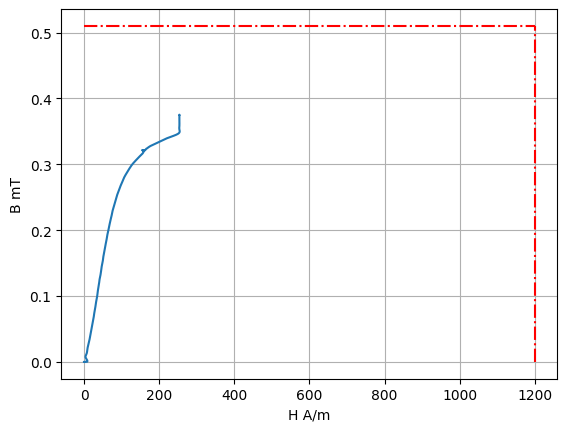

In [80]:
# --- Inputs you must have from your measurement ---
# vL: numpy array of the inductor voltage over the interval of interest (V)
# IL3: numpy array of the inductor current over same interval (A)
# Ts: sample period (s)
# N: number of turns
# Ae_mm2: effective core area in mm^2
# https://www.tdk-electronics.tdk.com/inf/80/db/fer/elp_102_20_38.pdf

N = 4
Ae_mm2 = 534.2
Ae = Ae_mm2 * 1e-6  # m^2

# ----- Preprocess voltage: remove DC offset to avoid drift -----


# ----- Integrate to get flux linkage then flux -----
# cumulative integral (rectangle rule); for better accuracy use trapezoid below
lambda_linkage = np.cumsum(vds_) * Ts              # Wb-turn
# or: lambda_linkage = np.concatenate(([0], np.cumtrapz(vL, dx=Ts)))

phi = lambda_linkage / N                          # Wb
B = phi / Ae  


le_mm = 121.2 #mm ELP 102/20/38 with I 102/7/38
le=le_mm *1e-3 # m
H = N*IL_filt/le


H_= H
Hsat =1200
#i = np.argmin(np.abs(H_-Hsat))
#Bsat_cal = B[i]
#print(Bsat_cal*1000, "mT") # 304.7746755662612 mT
plt.plot(H, B)
#plt.plot([Hsat, Hsat], [0,Bsat_cal], c="g")
#plt.plot([0, Hsat], [Bsat_cal,Bsat_cal], c="g")

#plt.plot([Hsat, Hsat], [0,0.3], c="r", linestyle="-.")
#plt.plot([0, Hsat], [0.3,0.3], c="r", linestyle="-.")
# phi = B*A = L*i 
#plt.xlim([-100,None])
#plt.plot(IL_, L_uH*1e-6*IL_/Ae)
plt.grid()
Hsat =1200
plt.plot([Hsat, Hsat], [0,0.51], c="r", linestyle="-.")
plt.plot([0, Hsat], [0.51,0.51], c="r", linestyle="-.")
# https://www.tdk-electronics.tdk.com/download/528886/81166f0de556e5b6a94db7793daed936/pdf-n97.pdf
plt.xlabel("H A/m")
plt.ylabel ("B mT")

Text(0, 0.5, 'B mT')

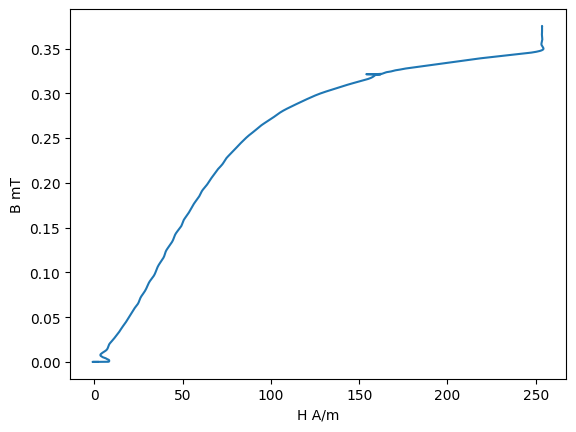

In [82]:
plt.plot(H, B)
# https://www.tdk-electronics.tdk.com/download/528886/81166f0de556e5b6a94db7793daed936/pdf-n97.pdf
plt.xlabel("H A/m")
plt.ylabel ("B mT")

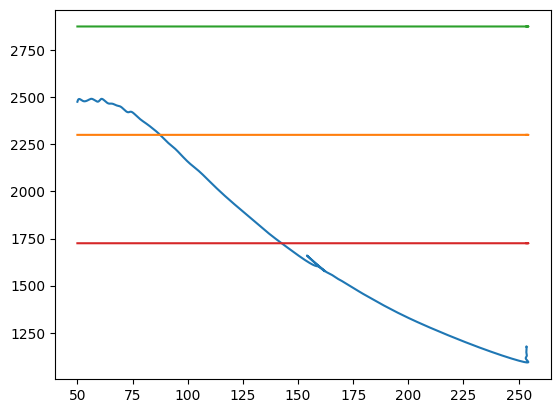

In [76]:
#B = u0 ue H 
#mu_0

mu_e= B/(H*mu_0)
mask = H> 50

x = H[mask]
y = mu_e[mask]

plt.plot(x, y)
# https://www.tdk-electronics.tdk.com/download/528886/81166f0de556e5b6a94db7793daed936/pdf-n97.pdf
plt.plot(x, [2300]*len(x))
plt.plot(x, [2300*1.25]*len(x)) # +25%
plt.plot(x, [2300*0.75]*len(x)) # -25%
#2300

In [57]:
STOP

NameError: name 'STOP' is not defined

In [ ]:
#Bsat/Hsat  =  mu_e*mu_0
IL2 = IL_[mask]

plt.plot(IL2, B2/(H2*mu_0))
plt.plot(IL2, B2/(Hf2*mu_0))
plt.title("mu_r")

# Eon Eoff

In [ ]:
# 2025-11-14_11-03-19-494.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("2025-11-14_11-03-19-494.csv")
df.head()

In [ ]:
Ts = df.Ts.values[0]

In [ ]:
vds = df.CH1.values*100 # x100 probe
#il =  df.CH3.values # x100 probe
#il = il -il[:500].mean()
iD =  df.CH3.values # x100 probe
diD = iD -iD[:500].mean()


plt.plot(iD)
#plt.plot(il)
#plt.ylim([-2,15])

In [ ]:
n1_on= 5000+500
n2_on= 6000-100


vds2_= vds[n1_on:n2_on]
id2_= iD[n1_on:n2_on]
id2_ = id2_ -id2_[-50:].mean()
pon = id2_*vds2_
Eon = np.sum(pon)*Ts
plt.plot(id2_*10)
plt.plot(vds2_)
plt.grid()
print("Eon µJ", Eon*1e6)